# Imports

In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
import shutil
import os
from google.colab.patches import cv2_imshow

## ICE-10. Image Transforms
Please download the input image from the following link:<br>
https://drive.google.com/file/d/11WCiKcdtXhbhaOnS4Y1VZfZgSQG9zWVo/view?usp=share_link <br><br>

In [113]:
if not os.path.exists("ICE 09 Pictures/"):
    ! gdown --folder https://drive.google.com/drive/folders/1UL1M3NnX1tmE0QsJAP5KRwvzYZypq31h?usp=sharing
    shutil.move("ICE 10 Pictures/001.jpg", "001.jpg")

Retrieving folder list
Processing file 1iAH-2sZzjfCibEyZhDp0U_0J4I13EhXe 001.jpg
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1iAH-2sZzjfCibEyZhDp0U_0J4I13EhXe
To: /content/ICE 10 Pictures/001.jpg
100% 71.5k/71.5k [00:00<00:00, 58.0MB/s]
Download completed


###**Tutorial Fast Fourier Transform**

Step 1: Compute the 2-dimensional Fast Fourier Transform.

Step 2: Shift the zero-frequency component to the center of the spectrum.

Step 3: Inverse of Step 2. Shift the zero-frequency component back to original location

Step 4: Inverse of Step 1. Compute the 2-dimensional inverse Fast Fourier Transform.


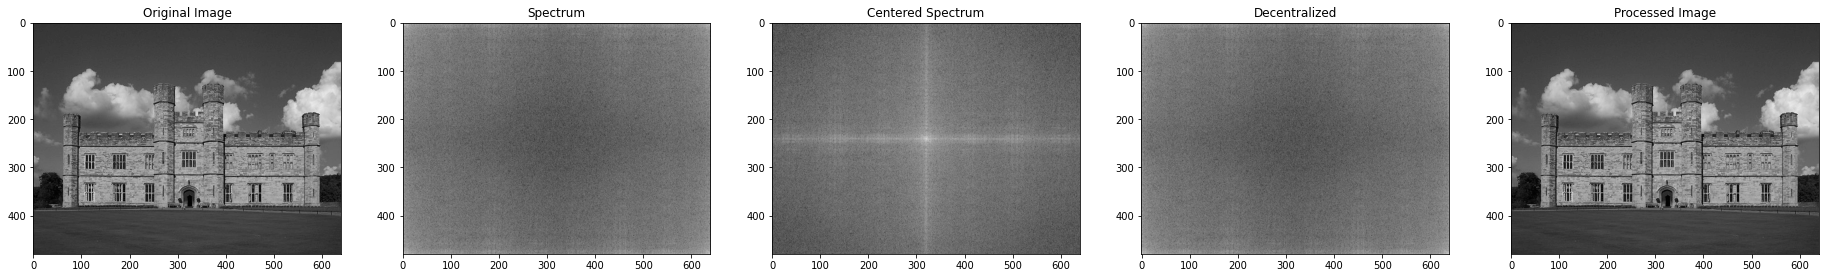

In [114]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("001.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

In [115]:
def distance(point1, point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base


# Question 1 

### What is Fourier Transform ?
### What is Fast Fourier Transform ?
### What is difference between Fast Fourier Transform and Fourier Transform ?
### Which is better FT or FFT ? If so why ?

A Fourier Transform (FT) is taking a data series and decomposing it into the frequency components, then finding the sine waves of each frequency component. Doing this to an image produces a frequency map that shows the distribution of color or grayscale values in the image.

A Fast Fourier Transform (FFT) computes the Discrete Fourier Transform (DFT) of a signal and does so faster than the vanilla calculation due to some algorithmic leveraging of how DFTs are structured.

Fourier Transform is a function that works with any type of series data. Fast Fourier Transform is an algorithm used to compute a discrete series of data.

Deciding which is better depends on the task at hand. For working with images, FFT is preferable since the data is discrete, and the speed advantage will reduce runtimes for image processing. However, if audio signals are being processed (or some other non-discrete series) then FT is not just the better option, it is the *only* option as FFT does not work with non-discrete data.

## Task 1

### By using above function please plot these filters with proper labels

- Ideal low Pass Filter
- Ideal High Pass Filter

In [116]:
d0 = 200
lpf = idealFilterLP(d0, img.shape)
hpf = idealFilterHP(d0, img.shape)

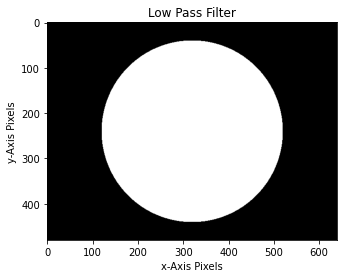

In [117]:
plt.imshow(lpf, cmap="gray")
plt.title("Low Pass Filter")
plt.xlabel("x-Axis Pixels")
plt.ylabel("y-Axis Pixels")
plt.show()

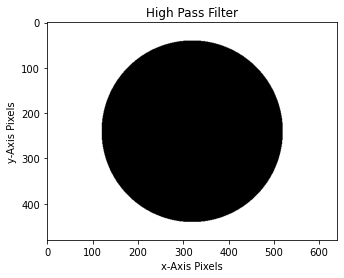

In [118]:
plt.imshow(hpf, cmap="gray")
plt.title("High Pass Filter")
plt.xlabel("x-Axis Pixels")
plt.ylabel("y-Axis Pixels")
plt.show()

## Task 2

### Just like above function of ideal filter , Write functions for the following filters 

- Butterworth low Pass Filter
- Butterworth High Pass Filter
- Gaussian low pass Filter
- Gaussian High pass Filter

In [119]:
# Filter setup
def filterBase(imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)

    return base, rows, cols, center

In [120]:
# Butterworth filters
def butterworthFilterLP(D0, imgShape, n):
    base, rows, cols, center = filterBase(imgShape)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = 1 / (1 + (distance((y, x), center) / D0) ** (2 * n))
    return base

def butterworthFilterHP(D0, imgShape, n):
    lp = butterworthFilterLP(D0, imgShape, n)
    return 1.0 - lp

In [121]:
# Gaussian filters
def gaussianFilterLP(D0, imgShape):
    base, rows, cols, center = filterBase(imgShape)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = exp(((-distance((y, x), center) ** 2) / (2 * (D0 ** 2))))
    return base
            
def gaussianFilterHP(D0, imgShape):
    return 1 - gaussianFilterLP(D0, imgShape)

## Task 3

### By using task 2 functions please plot these filters with proper labels

- Butterworth low Pass Filter for n = 5
- Butterworth High Pass Filter for n = 5
- Butterworth low Pass Filter for n = 20
- Butterworth High Pass Filter for n = 20 
- Gaussian Low Pass Filter
- Gaussian High Pass Filter


In [122]:
# Plot function
def plotFilter(filter, filter_name, high_low):
    plt.imshow(filter, cmap="gray")
    plt.title(filter_name.capitalize() + " " + high_low.capitalize() + " Pass Filter")
    plt.show()

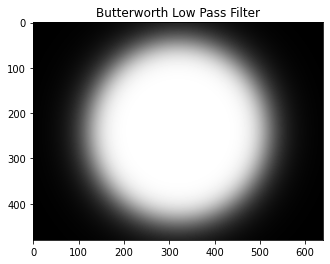

In [123]:
# Butterworth low pass n=5
n = 5
name = "butterworth"
hl = "low"
filter = butterworthFilterLP(d0, img.shape, n)
plotFilter(filter, name, hl)

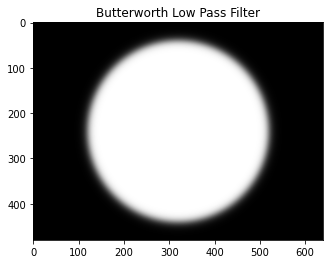

In [124]:
# Butterworth low pass filter n=20
n = 20
name = "butterworth"
hl = "low"
filter = butterworthFilterLP(d0, img.shape, n)
plotFilter(filter, name, hl)

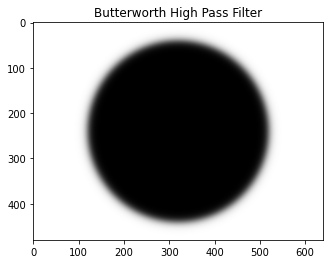

In [125]:
# Butterworth high pass filter n=20
n = 20
name = "butterworth"
hl = "high"
filter = butterworthFilterHP(d0, img.shape, n)
plotFilter(filter, name, hl)

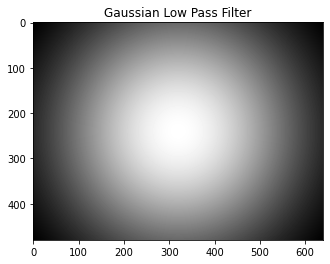

In [126]:
# Gaussian low pass filter
name = "gaussian"
hl = "low"
filter = gaussianFilterLP(d0, img.shape)
plotFilter(filter, name, hl)

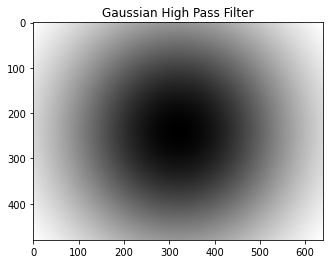

In [127]:
# Gaussian high pass filter
name = "gaussian"
hl = "high"
filter = gaussianFilterHP(d0, img.shape)
plotFilter(filter, name, hl)

# Question 2

### What is Low pass Filter ? 
### Applications of low pass filter ? 
### What is high pass Filter ? 
### Applications of high pass filter ? 

A low pass filter is a filter that checks each value of an input, and if that value is lower than a predefined cutoff value then the value is kept, otherwise the value is attenuated.

Low pass filters are used to reduce high frequency noise in inputs, most often in image and audio inputs. Since noise values are high frequency or extreme in value, noise values are often beyond the cutoff values and are therefore attenuated, removing the noise. Low pass filters can also be used to blur images.

High pass filters are the inverse of low pass filters. They check each value of an input and if that value is *higher* than a predefined cutoff, then the value is kept, and otherwise the value is discarded.

High pass filters are used to reduce low frequency noise in inputs, again in the inverse of what a low pass filter does. They can also be used to sharpen an image, and pick up edges.

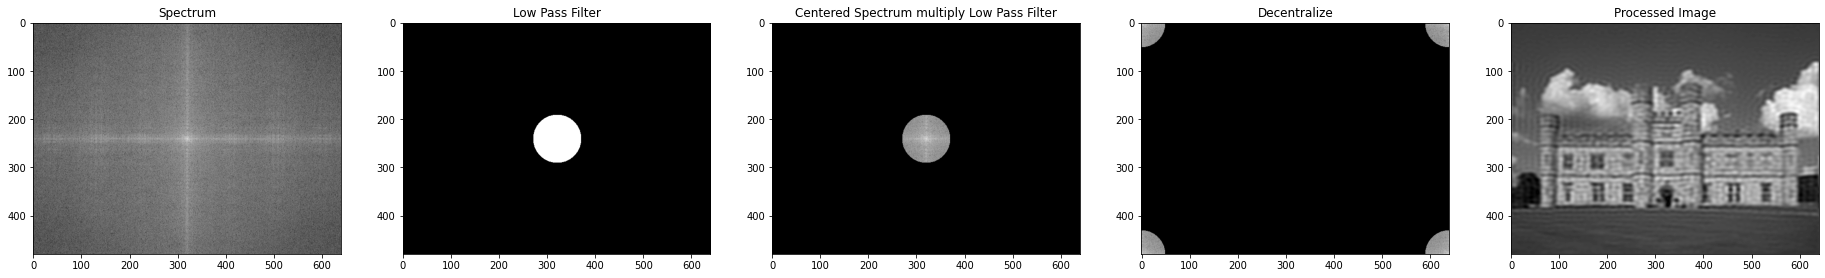

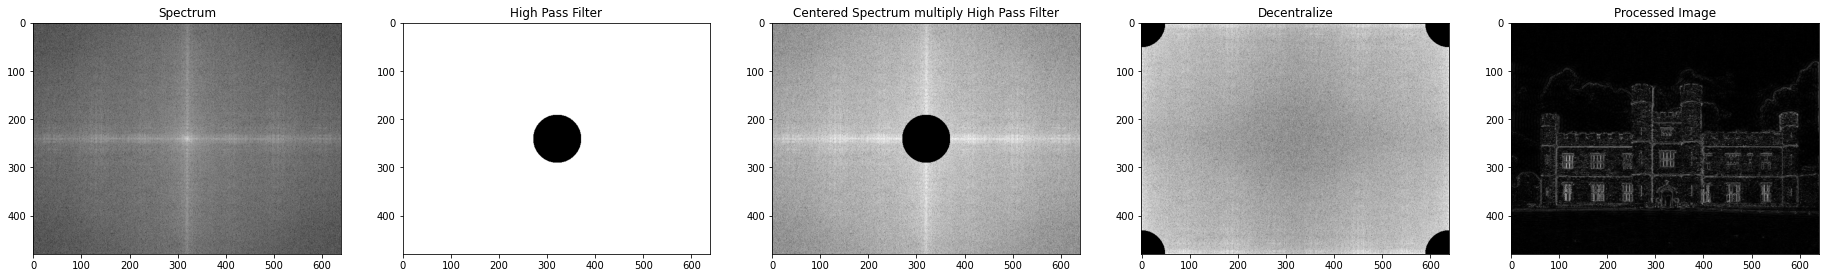

In [128]:
# Tutorial 
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()
############
print("========================================================================================================================".ljust(194, "="))
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

# **Question 3**


## In the task above what is the characteristics of low pass and high pass filter ?

- Explain how the behavoiur change from left image to right image in both the filters 
- conclude what each kind of filter does here 

Both images start with the Fourier Transformed spectrum of the original image. After that is the image of the high (bottom) or low (top) pass filter. The middle image is the spectrum multiplied by the high (bottom) or low (top) pass filters with a centered process, creating the low/high pass filtered spectrum. The next image is the decentralized filtered spectrums, where high frequency values are moved towards the edge of the image while low frequency values are shifted towards the middle. The final image in each series is the result of an inverse Fourier Transform, which constructs the filtered image from the decentralized filtered spectrum.

In this example, the low pass filter has noticeably blurred the image. The high pass filter has detected the edges within the image.

## Task 4

### By using task 2 functions write code for High pass centered filters and plot these filters with proper labels

- Ideal High Pass
- Butterworth High Pass (n=15)
- Gaussian High Pass

In [129]:
# Get center
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

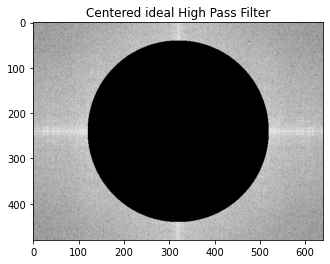

In [130]:
# Centered ideal high pass
name = "Centered Ideal"
hl = "high"
filter = idealFilterHP(d0, img.shape) * center
filter = np.log(1+np.abs(filter))
plotFilter(filter, name, hl)

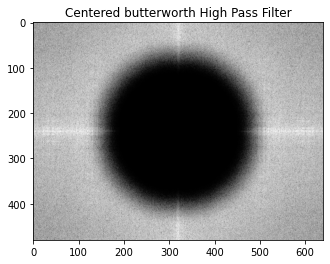

In [131]:
# Centered butterworth high pass n=15
name = "Centered Butterworth"
hl = "high"
n = 15
filter = butterworthFilterHP(d0, img.shape, n) * center
filter = np.log(1+np.abs(filter))
plotFilter(filter, name, hl)

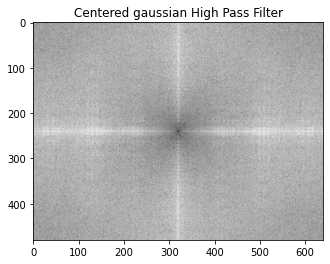

In [132]:
# Centered gaussian high pass
name = "Centered Gaussian"
hl = "high"
filter = gaussianFilterHP(d0, img.shape) * center
filter = np.log(1+np.abs(filter))
plotFilter(filter, name, hl)

# Question 4 

### Which has more smooth image , Gaussian filter or Butterworth ? 
### Ideal filter , Butterworth filter and Gaussian filter. Distortion is high in which filter among these ? 

For all values of n greater than 1, Gaussian filters are smoother than Butterworth filters. For the case where n is 1 in a Butterworth filter, the filters are equally smooth (example below).

Distortion is highest in either ideal or Butterworth filters, depending on the value of n used in the Butterworth filter. For low values of n, the distortion is greatest in ideal filters. For larger values of n, distortion is greater with the Butterworth filters.

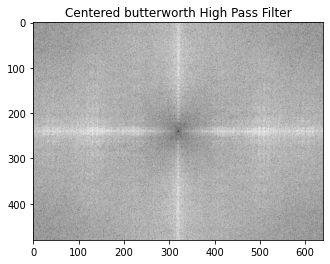

In [136]:
# Centered butterworth high pass n=15
name = "Centered Butterworth"
hl = "high"
n = 1
filter = butterworthFilterHP(d0, img.shape, n) * center
filter = np.log(1+np.abs(filter))
plotFilter(filter, name, hl)

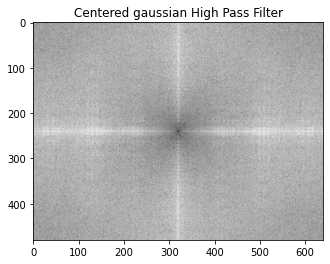

In [137]:
# Centered gaussian high pass
name = "Centered Gaussian"
hl = "high"
filter = gaussianFilterHP(d0, img.shape) * center
filter = np.log(1+np.abs(filter))
plotFilter(filter, name, hl)